<a href="https://colab.research.google.com/github/ysnlakshmi/21-Day-Project/blob/main/Stock_Price_Predict_using_NITFY_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction (NIFTY 50)

This project focuses on predicting **NIFTY 50 stock prices** using both **Machine Learning (ML)** and **Deep Learning (DL)** approaches.  
The workflow involves preparing time-series data, training multiple models, and comparing their performance.

---

## Pipeline Overview

1. **Data Loading**
   - Load stock price data (`data.csv`).
   - Features: `Open`, `Close`, `High`, `Low`.

2. **Data Preparation**
   - Create supervised learning datasets using sliding windows (30–250 days).
   - Generate `(X, y)` pairs for each feature.

3. **Modeling**
   - **Machine Learning Models**  
     - Linear: `LinearRegression`, `Ridge`, `Lasso`  
     - Tree-based: `RandomForest`, `GradientBoosting`, `XGBoost`, `LightGBM`  
     - Others: `SVR`, `KNN`
   - **Deep Learning Models**  
     - RNN, LSTM, GRU, Bidirectional LSTM (Keras Sequential API)

4. **Training**
   - Train models on rolling window datasets.
   - Evaluate using **MAE** and **RMSE**.

5. **Evaluation & Comparison**
   - Store results for all models.
   - Compare ML vs DL models for different input window sizes.

---

## Key Highlights
- Hybrid pipeline combining **classical ML** and **neural networks**.  
- Uses **multiple time horizons (30–250 days)** for robust prediction.  
- Tracks **training and testing errors** to evaluate generalization.  

1. **Import Libraries**
   - `numpy`, `pandas`: data handling  
   - `tqdm`: progress bars  
   - `sklearn`: machine learning models & metrics  
   - `xgboost`, `lightgbm`: gradient boosting models  
   - `warnings`: ignore warnings  

2. **Load Dataset**
   - `df = pd.read_csv('data.csv')` → load data from CSV  
   - `df.head()` → preview first 5 rows  

3. **Models Imported**
   - Linear: `LinearRegression`, `Ridge`, `Lasso`  
   - Tree-based: `RandomForestRegressor`, `GradientBoostingRegressor`  
   - Others: `SVR`, `KNeighborsRegressor`, `XGBRegressor`, `LGBMRegressor`  

4. **Metrics Imported**
   - `mean_absolute_error`, `mean_squared_error` → to evaluate model performance  


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishjangra27/nifty-50-25-yrs-data")

print("Path to dataset files:", path)

100%|██████████| 90.9k/90.9k [00:00<00:00, 48.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ashishjangra27/nifty-50-25-yrs-data/versions/1


In [3]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from copy import deepcopy


from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Update the path to read the CSV file from the correct location
df = pd.read_csv('/root/.cache/kagglehub/datasets/ashishjangra27/nifty-50-25-yrs-data/versions/1/data.csv')
df.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


1. **Train-Test Split**
   - `train_test_split()` → split data into training & testing sets.  

2. **Models List**
   - A collection of regressors:  
     - Linear: `LinearRegression`, `Ridge`, `Lasso`  
     - Tree-based: `RandomForestRegressor`, `GradientBoostingRegressor`  
     - Others: `SVR`, `KNeighborsRegressor`, `XGBRegressor`, `LGBMRegressor`  

3. **Training Loop**
   - For each model:  
     - `fit()` → train on training data  
     - `predict()` → generate predictions on test data  

4. **Evaluation**
   - Metrics used:  
     - `mean_absolute_error`  
     - `mean_squared_error`  
   - Store results for comparison of all models.  

In [4]:
def return_pairs(column, days):
    """
    Creates input-output pairs for time series prediction.

    Args:
        column (pandas.Series): The time series data.
        days (int): The number of past days to use as input.

    Returns:
        tuple: A tuple containing two numpy arrays: X (input sequences) and y (target values).
    """
    pricess = list(column)
    X = []
    y = []
    for i in range(len(pricess) - days):
        X.append(pricess[i:i+days])
        y.append(pricess[i+days])
    return np.array(X), np.array(y)

# Define the target column and specific time windows
target_column = 'High'
day_chunks = [30, 60, 90]

chunked_data = {}

# Generate chunked data for the target column and specified time windows
for days in day_chunks:
    key_X = f"X_{target_column}_{days}"
    key_y = f"y_{target_column}_{days}"
    X, y = return_pairs(df[target_column], days)
    chunked_data[key_X] = X
    chunked_data[key_y] = y

# Create a list of chunk pairs
chunk_pairs = []
for days in day_chunks:
    key_X = f"X_{target_column}_{days}"
    key_y = f"y_{target_column}_{days}"
    if key_X in chunked_data and key_y in chunked_data:
        chunk_pairs.append([key_X, key_y])

print("Generated data chunks for 'High' price with specified time windows:")
for key, value in chunked_data.items():
    print(f"{key}: Shape {value.shape}")

print("\nChunk pairs for training and evaluation:")
for pair in chunk_pairs:
    print(pair)

Generated data chunks for 'High' price with specified time windows:
X_High_30: Shape (6285, 30)
y_High_30: Shape (6285,)
X_High_60: Shape (6255, 60)
y_High_60: Shape (6255,)
X_High_90: Shape (6225, 90)
y_High_90: Shape (6225,)

Chunk pairs for training and evaluation:
['X_High_30', 'y_High_30']
['X_High_60', 'y_High_60']
['X_High_90', 'y_High_90']


Now that the data is prepared, we can define and train the models for predicting the 'High' price using the specified time windows.

1. **Imports**
   - `Sequential` → build models layer-by-layer  
   - Layers: `Dense`, `SimpleRNN`, `LSTM`, `GRU`, `Bidirectional`  

2. **Model Builder Functions**
   - `build_rnn(input_shape)`  
     - Simple RNN with 50 units → `Dense(1)` output  
   - `build_lstm(input_shape)`  
     - LSTM with 50 units → `Dense(1)` output  
   - `build_gru(input_shape)`  
     - GRU with 50 units → `Dense(1)` output  
   - `build_bilstm(input_shape)`  
     - Bidirectional LSTM with 50 units → `Dense(1)` output  

3. **Compilation**
   - Optimizer: `adam`  
   - Loss: `mse` (Mean Squared Error)  

4. **Purpose**
   - All models → designed for **regression tasks on sequential data**.  

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the models to be used
ml_models = {
    'KNN': KNeighborsRegressor()
}

dl_models = {
    'RNN': SimpleRNN,
    'GRU': GRU,
    'LSTM': LSTM,
    'Bidirectional LSTM': Bidirectional
}

results = {}
epochs = 50

for X_key, y_key in tqdm(chunk_pairs, desc="Processing time windows"):
    X = chunked_data[X_key]
    y = chunked_data[y_key]
    days = int(X_key.split('_')[-1]) # Extract number of days from key

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale data for Deep Learning models
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Reshape for RNN input
    X_train_scaled_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_scaled_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    print(f"\nTraining models for input window of {days} days:")

    # Train and evaluate ML model (KNN)
    print("Training KNN model...")
    model_name = 'KNN'
    ml_model = deepcopy(ml_models[model_name])
    ml_model.fit(X_train, y_train)
    y_pred_ml = ml_model.predict(X_test)

    mae_ml = mean_absolute_error(y_test, y_pred_ml)
    rmse_ml = np.sqrt(mean_squared_error(y_test, y_pred_ml))

    results[f'{model_name}_{days}_days'] = {'MAE': mae_ml, 'RMSE': rmse_ml}
    print(f"{model_name} - MAE: {mae_ml:.4f}, RMSE: {rmse_ml:.4f}")

    # Train and evaluate Deep Learning models
    for model_name, dl_model_fn in tqdm(dl_models.items(), desc="Training DL models"):
        print(f"Training {model_name} model...")
        model = Sequential()
        if model_name == 'Bidirectional LSTM':
            model.add(Bidirectional(LSTM(50, return_sequences=False), input_shape=(days, 1)))
        else:
            model.add(dl_model_fn(50, input_shape=(days, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        history = model.fit(X_train_scaled_rnn, y_train_scaled, epochs=epochs, batch_size=32, verbose=0)

        y_pred_scaled_dl = model.predict(X_test_scaled_rnn)
        y_pred_dl = scaler_y.inverse_transform(y_pred_scaled_dl)

        mae_dl = mean_absolute_error(y_test, y_pred_dl)
        rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))

        results[f'{model_name}_{days}_days'] = {'MAE': mae_dl, 'RMSE': rmse_dl}
        print(f"{model_name} - MAE: {mae_dl:.4f}, RMSE: {rmse_dl:.4f}")

print("\n--- Results Summary ---")
for model_days, metrics in results.items():
    print(f"{model_days}: MAE={metrics['MAE']:.4f}, RMSE={metrics['RMSE']:.4f}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the models to be used
ml_models = {
    'KNN': KNeighborsRegressor()
}

dl_models = {
    'RNN': SimpleRNN,
    'GRU': GRU,
    'LSTM': LSTM,
    'Bidirectional LSTM': Bidirectional
}

results = {}
epochs = 50

for X_key, y_key in tqdm(chunk_pairs, desc="Processing time windows"):
    X = chunked_data[X_key]
    y = chunked_data[y_key]
    days = int(X_key.split('_')[-1]) # Extract number of days from key

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale data for Deep Learning models
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Reshape for RNN input
    X_train_scaled_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_scaled_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    print(f"\nTraining models for input window of {days} days:")

    # Train and evaluate ML model (KNN)
    print("Training KNN model...")
    model_name = 'KNN'
    ml_model = deepcopy(ml_models[model_name])
    ml_model.fit(X_train, y_train)
    y_pred_ml = ml_model.predict(X_test)

    mae_ml = mean_absolute_error(y_test, y_pred_ml)
    rmse_ml = np.sqrt(mean_squared_error(y_test, y_pred_ml))

    results[f'{model_name}_{days}_days'] = {'MAE': mae_ml, 'RMSE': rmse_ml}
    print(f"{model_name} - MAE: {mae_ml:.4f}, RMSE: {rmse_ml:.4f}")

    # Train and evaluate Deep Learning models
    for model_name, dl_model_fn in tqdm(dl_models.items(), desc="Training DL models"):
        print(f"Training {model_name} model...")
        model = Sequential()
        if model_name == 'Bidirectional LSTM':
            model.add(Bidirectional(LSTM(50, return_sequences=False), input_shape=(days, 1)))
        else:
            model.add(dl_model_fn(50, input_shape=(days, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        history = model.fit(X_train_scaled_rnn, y_train_scaled, epochs=epochs, batch_size=32, verbose=0)

        y_pred_scaled_dl = model.predict(X_test_scaled_rnn)
        y_pred_dl = scaler_y.inverse_transform(y_pred_scaled_dl)

        mae_dl = mean_absolute_error(y_test, y_pred_dl)
        rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))

        results[f'{model_name}_{days}_days'] = {'MAE': mae_dl, 'RMSE': rmse_dl}
        print(f"{model_name} - MAE: {mae_dl:.4f}, RMSE: {rmse_dl:.4f}")

print("\n--- Results Summary ---")
for model_days, metrics in results.items():
    print(f"{model_days}: MAE={metrics['MAE']:.4f}, RMSE={metrics['RMSE']:.4f}")

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional


def build_rnn(input_shape):
    model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=input_shape),
        Dense(1)   # regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm(input_shape):
    model = Sequential([
        LSTM(50, activation='tanh', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(50, activation='tanh', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_bilstm(input_shape):
    model = Sequential([
        Bidirectional(LSTM(50, activation='tanh'), input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

1. **ml_models (Traditional ML)**
   `KNN`  

2. **dl_models (Deep Learning)**
   - A dictionary: {name: builder function}  
   - Includes:  
     - `"RNN"` → `build_rnn`  
     - `"LSTM"` → `build_lstm`  
     - `"GRU"` → `build_gru`  
     - `"Bidirectional_LSTM"` → `build_bilstm`  

3. **Purpose**
   - `ml_models`: ready-to-train classical ML regressors  
   - `dl_models`: functions that return compiled neural nets (when given `input_shape`)  

In [6]:
# Define the models to be used
ml_models = {
    'KNN': KNeighborsRegressor()
}

dl_models = {
    "RNN": build_rnn,
    "LSTM": build_lstm,
    "GRU": build_gru,
    "Bidirectional LSTM": build_bilstm
}

1. **Initialize**
   - `trained_models = {}` → store results of all models  

2. **Iterate over Data Pairs**
   - For each `(X, y)` in `chunk_pairs`  
   - Extract features `X_data` and target `y_data` from `chunked_data`  
   - Split → `train_test_split` (90% train, 10% test)  

3. **Train ML Models**
   - Loop through `ml_models`  
   - Use `deepcopy` to avoid reusing fitted models  
   - `fit()` on training data  
   - Predict on train & test sets  
   - Save model + metrics:  
     - `train_mae`, `train_rmse`  
     - `test_mae`, `test_rmse`  

4. **Prepare Data for DL**
   - Expand dims → shape becomes `(samples, timesteps, features)`  

5. **Train DL Models**
   - Loop through `dl_models`  
   - Build model with correct input shape  
   - Train for 10 epochs, batch size = 8  
   - Predict on train & test  
   - Save model + metrics (same as ML)  

6. **Final Output**
   - `trained_models` → dictionary with all trained models & evaluation scores  


In [8]:
trained_models = {}

from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

for X_key, y_key in tqdm(chunk_pairs, desc="Processing time windows"):
    X_data = chunked_data[X_key]
    y_data = chunked_data[y_key]
    days = int(X_key.split('_')[-1])

    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, random_state=42
    )

    # Scale data for Deep Learning models
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Reshape for RNN input
    X_train_scaled_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_scaled_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


    # ML models
    for model_name, model in tqdm(ml_models.items(), desc=f"Training ML models for {days} days"):
        key = model_name + '_' + X_key.split('_')[-1] + '_days'
        model_copy = deepcopy(model)
        model_copy.fit(X_train, y_train)

        y_train_pred = model_copy.predict(X_train)
        y_test_pred = model_copy.predict(X_test)

        trained_models[key] = {
            'model': model_copy,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }

    # DL models
    epochs = 50 # Set epochs to 50 for DL models
    for model_name, builder in tqdm(dl_models.items(), desc=f"Training DL models for {days} days"):
        key = model_name + '_' + X_key.split('_')[-1] + '_days'
        model_dl = builder((X_train_scaled_rnn.shape[1], 1))

        model_dl.fit(X_train_scaled_rnn, y_train_scaled, epochs=epochs, batch_size=32, verbose=0)

        y_train_pred_scaled = model_dl.predict(X_train_scaled_rnn)
        y_test_pred_scaled = model_dl.predict(X_test_scaled_rnn)

        y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled).flatten()
        y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled).flatten()


        trained_models[key] = {
            'model': model_dl,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }

print("\n--- Results Summary ---")
for model_days, metrics in trained_models.items():
    print(f"{model_days}:")
    print(f"  Train MAE: {metrics['train_mae']:.4f}, Train RMSE: {metrics['train_rmse']:.4f}")
    print(f"  Test MAE: {metrics['test_mae']:.4f}, Test RMSE: {metrics['test_rmse']:.4f}")

Processing time windows:   0%|          | 0/3 [00:00<?, ?it/s]

Training ML models for 30 days:   0%|          | 0/1 [00:00<?, ?it/s]

Training DL models for 30 days:   0%|          | 0/4 [00:00<?, ?it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Training ML models for 60 days:   0%|          | 0/1 [00:00<?, ?it/s]

Training DL models for 60 days:   0%|          | 0/4 [00:00<?, ?it/s]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Training ML models for 90 days:   0%|          | 0/1 [00:00<?, ?it/s]

Training DL models for 90 days:   0%|          | 0/4 [00:00<?, ?it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

--- Results Summary ---
KNN_30_days:
  Train MAE: 46.0313, Train RMSE: 73.9860
  Test MAE: 63.0793, Test RMSE: 100.9408
RNN_30_days:
  Train MAE: 61.5255, Train RMSE: 95.3718
  Test MAE: 63.7638, Test RMSE: 101.6646
LSTM_30_days:
  Train MAE: 103.2747, Train RMSE: 144.0917
  Test MAE: 105.9172, Test RMSE: 152.2513
GRU_30_days:
  Train MAE: 65.8270, Train RMSE: 96.6211
  Test MAE: 67.5349, Test RMSE: 100.2594
Bidirectional LSTM_30_days:
  Train MAE: 90.0235, Train RMSE: 123.5739
  Test MAE: 90.2312, Test RMSE: 126.5182
KNN_60_days:
  Train MAE: 40.5229, Train RMSE: 63.9015
  Test MAE: 57.7650, Test RMSE: 93.6251
RNN_60_days:
  Train MAE: 78.4664, Train RMSE: 118.550

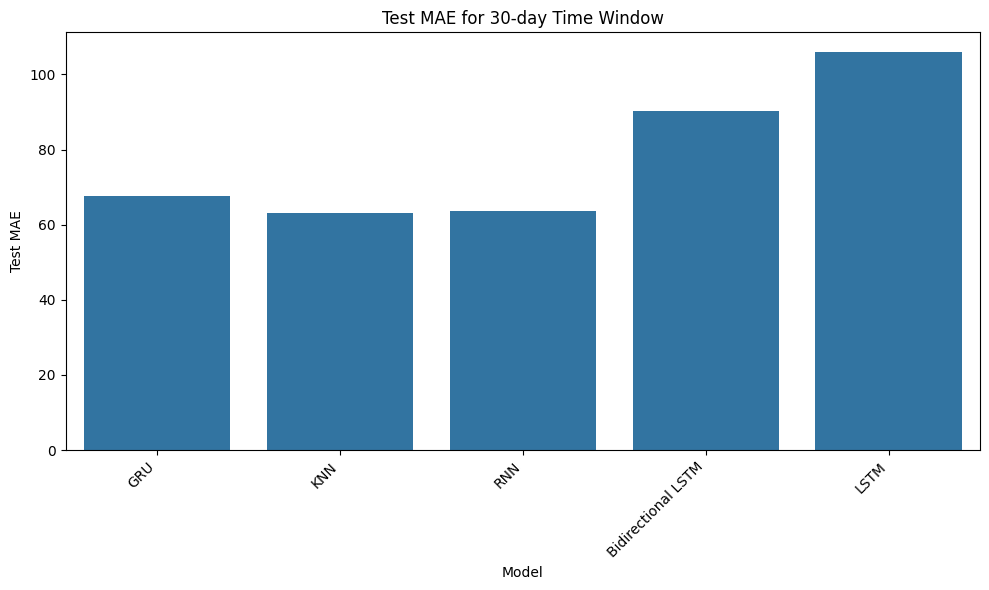

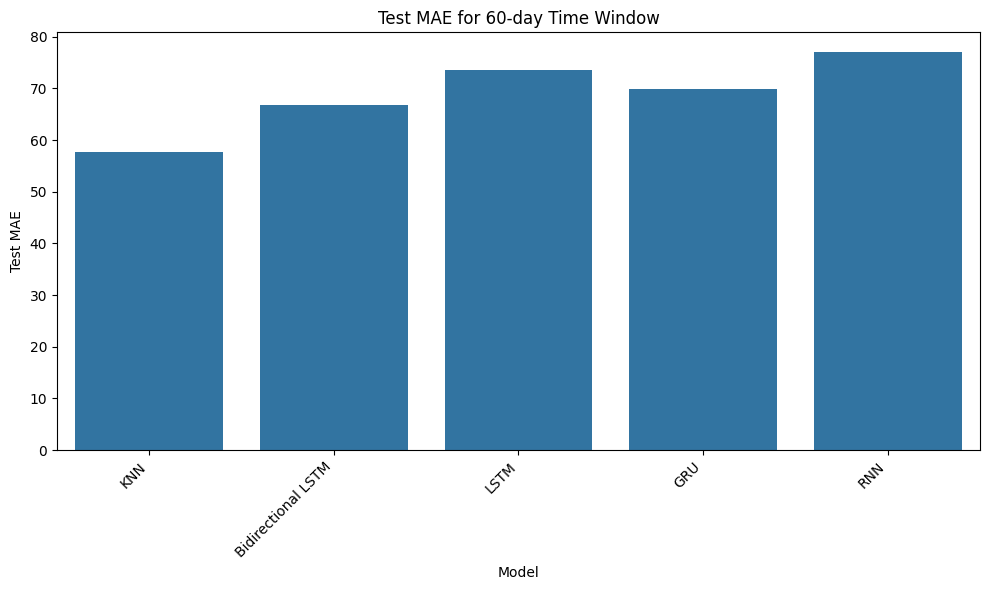

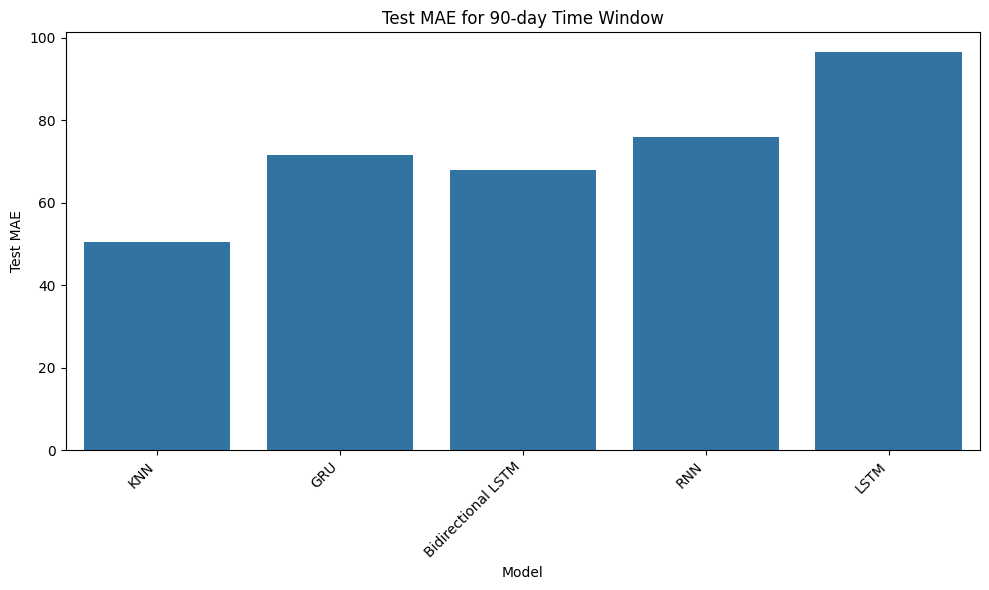

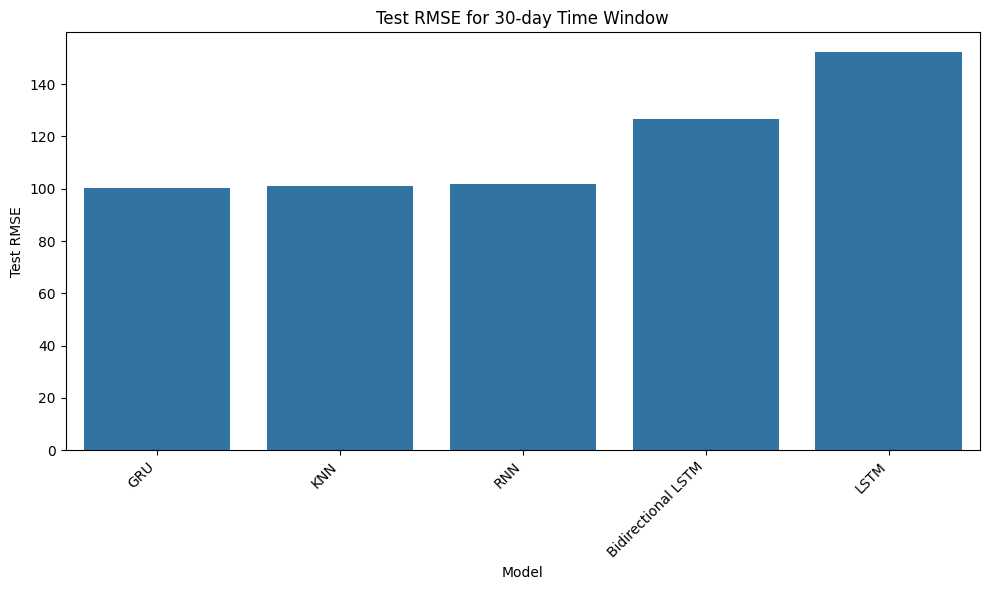

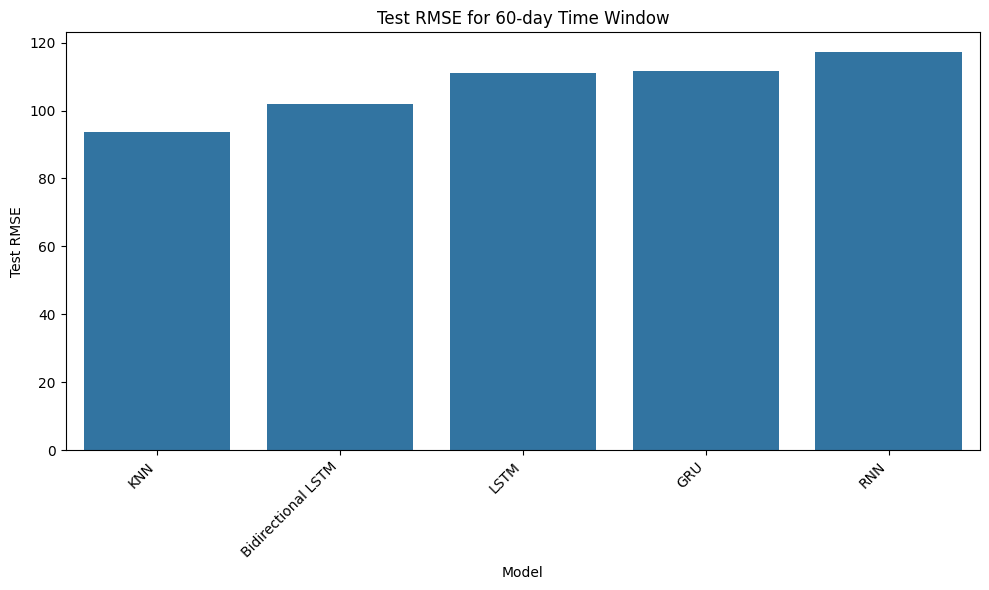

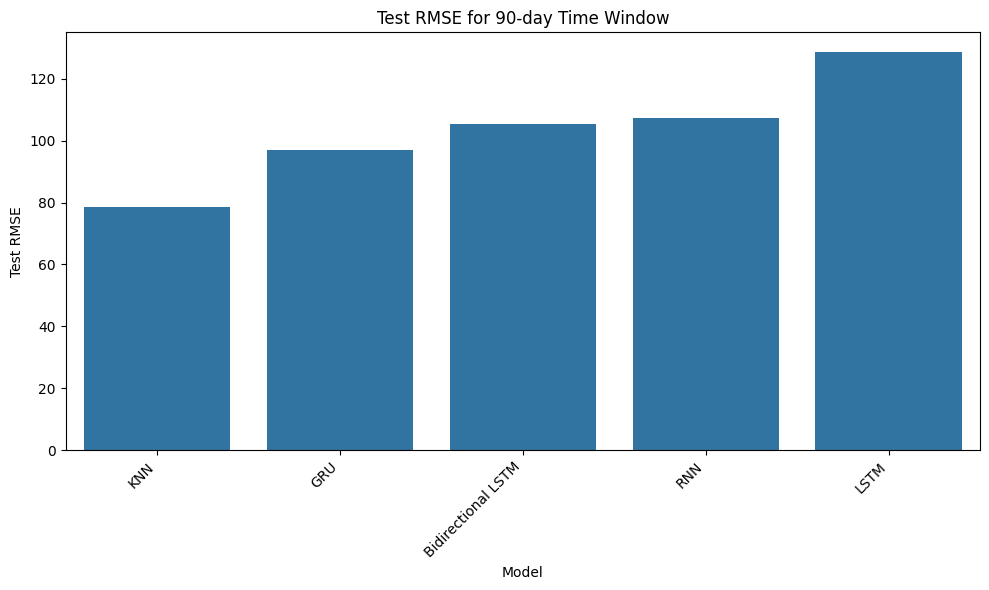

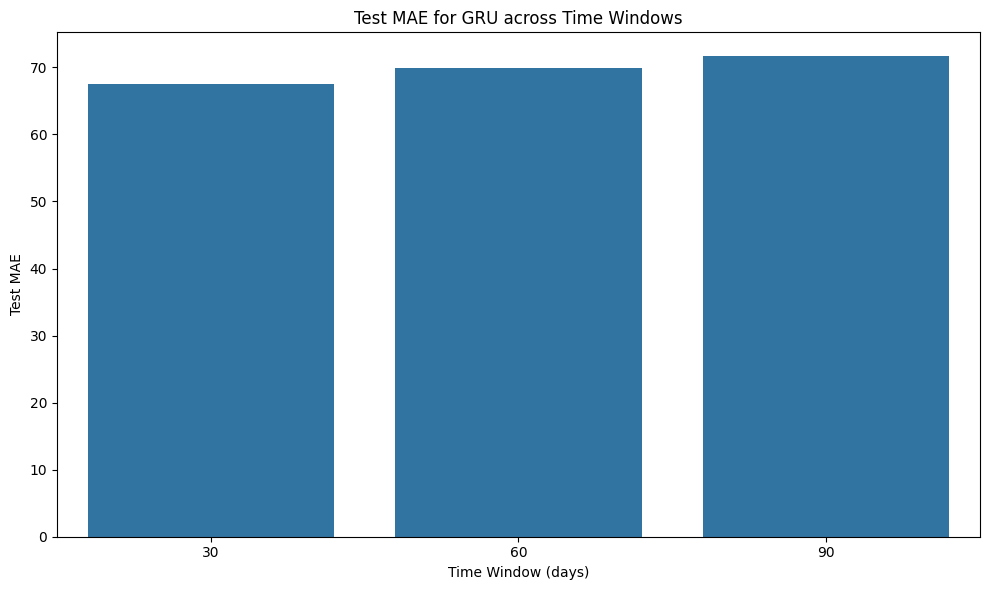

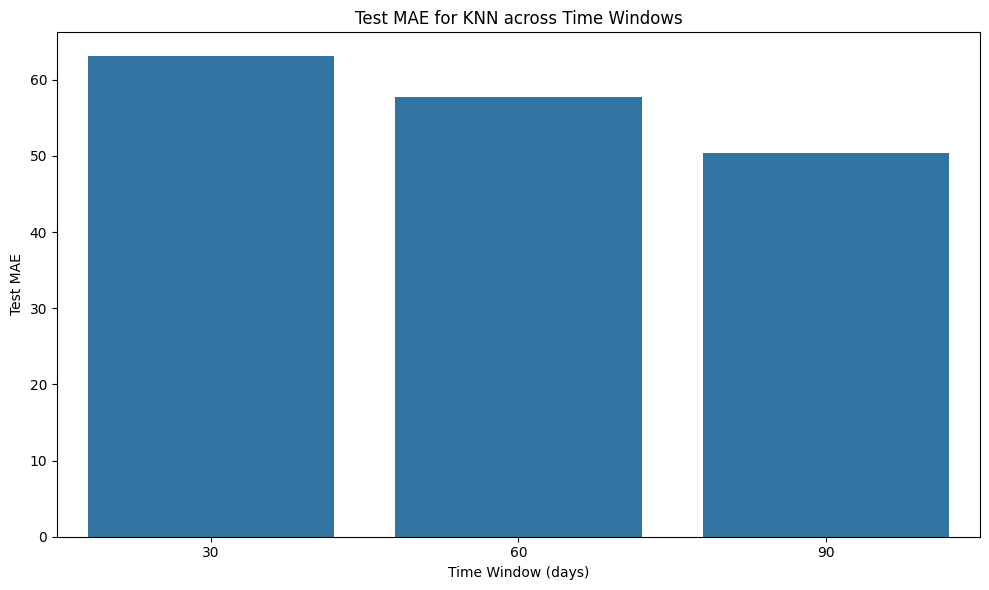

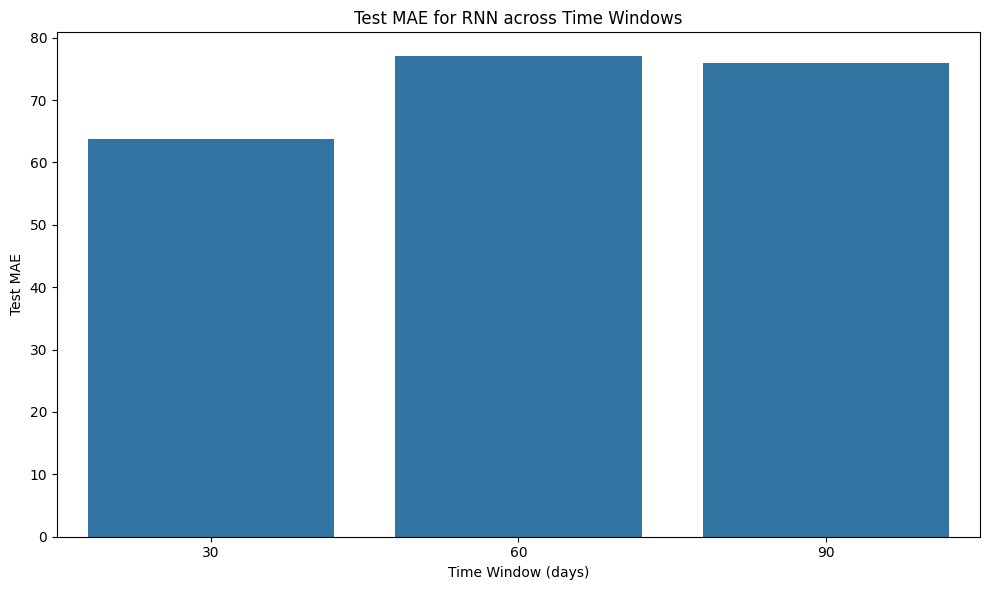

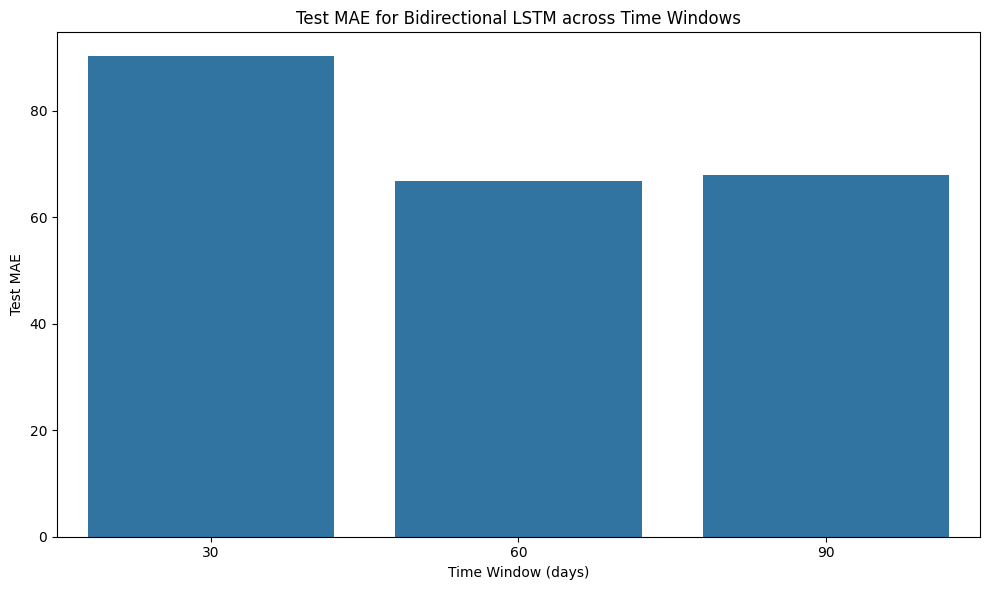

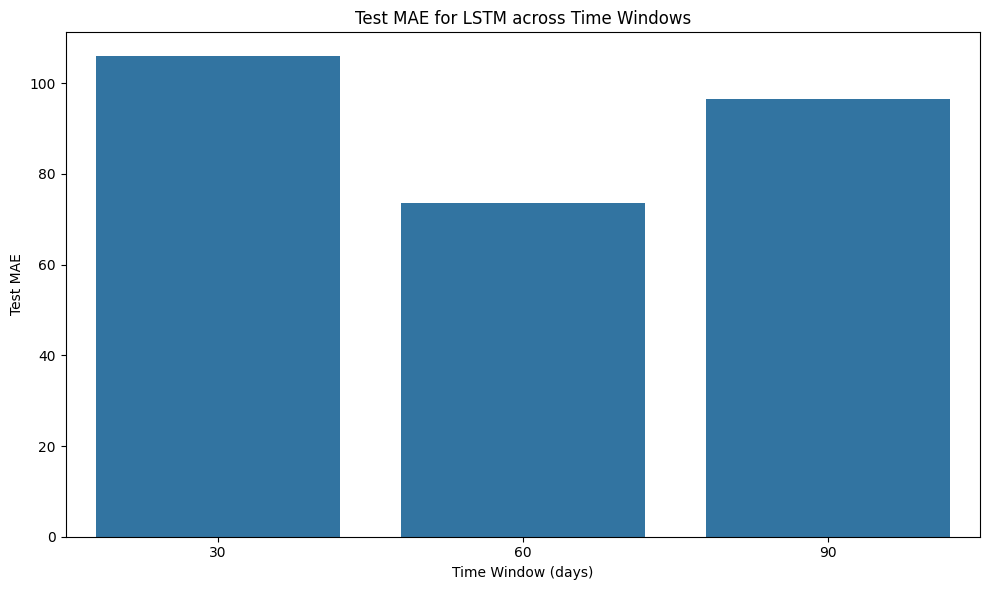

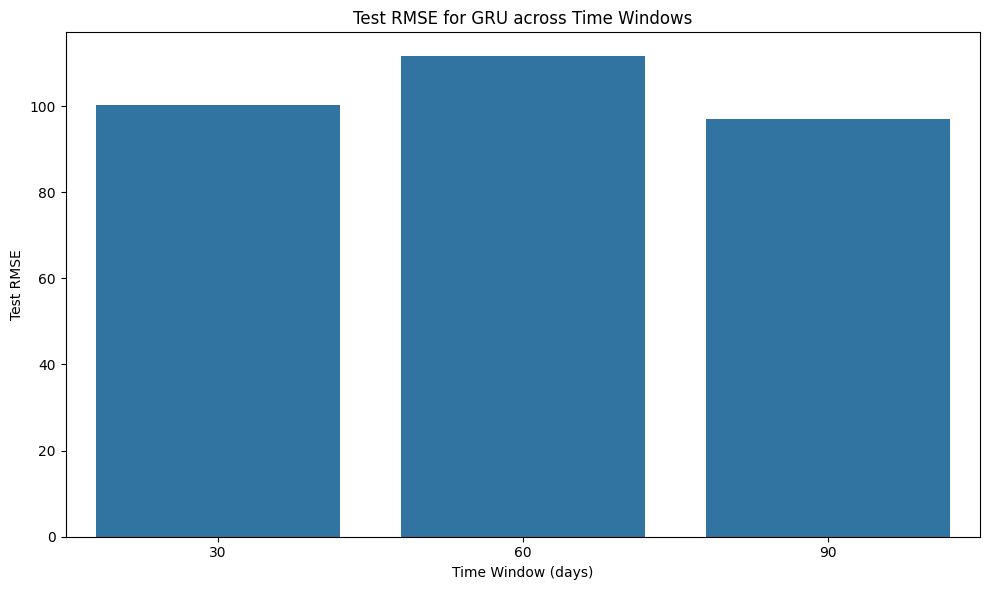

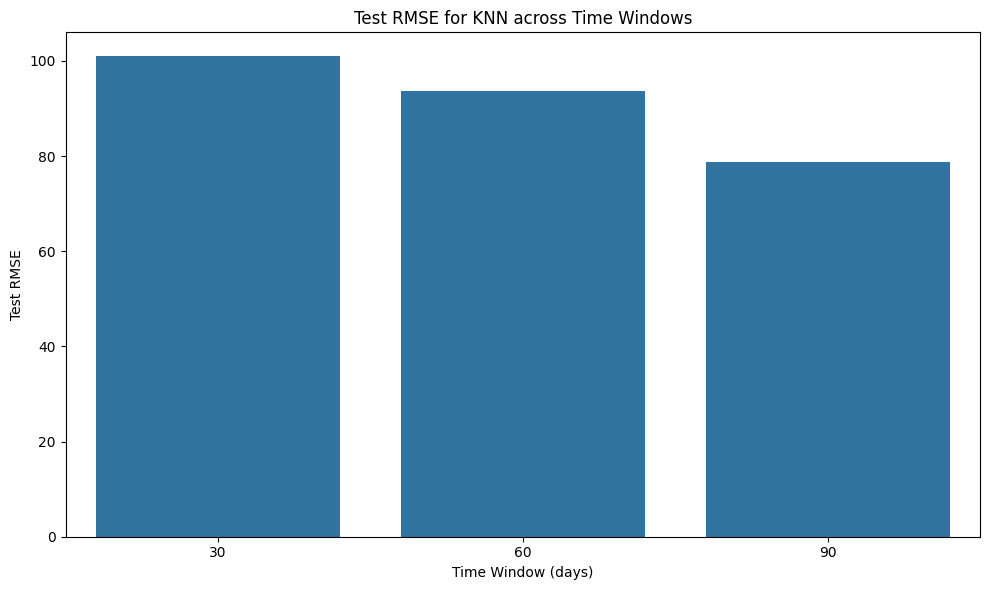

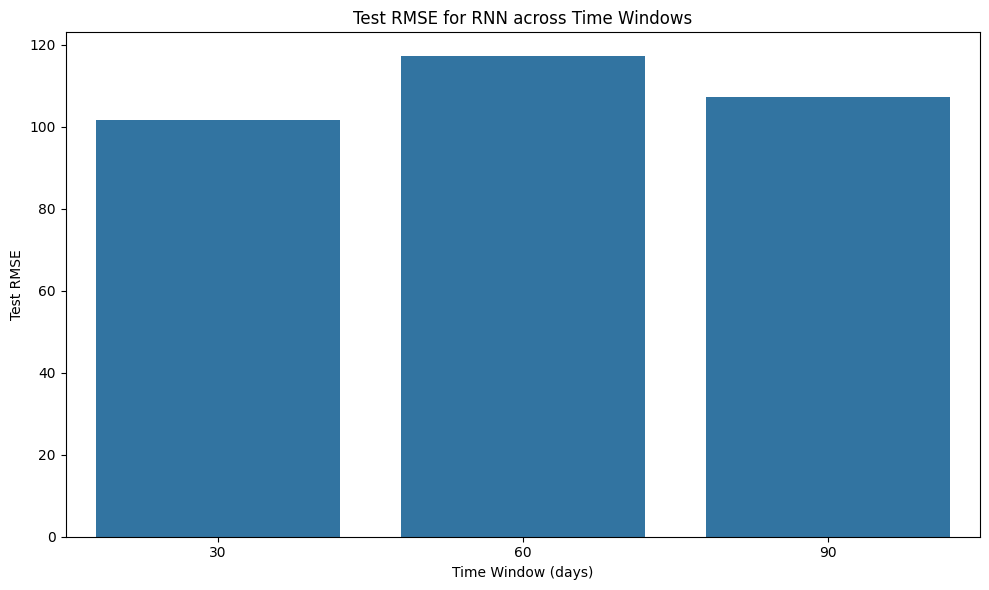

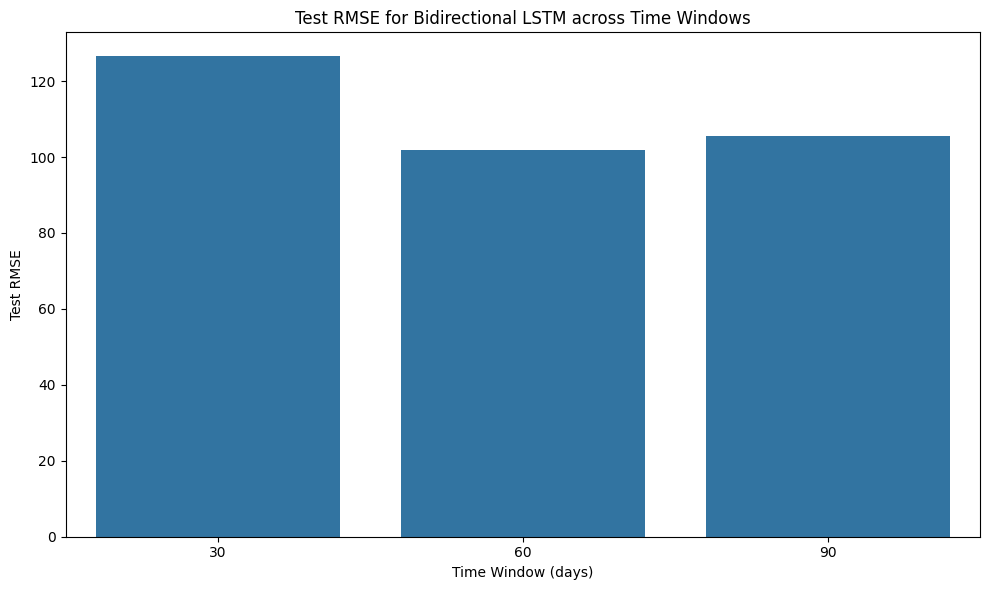

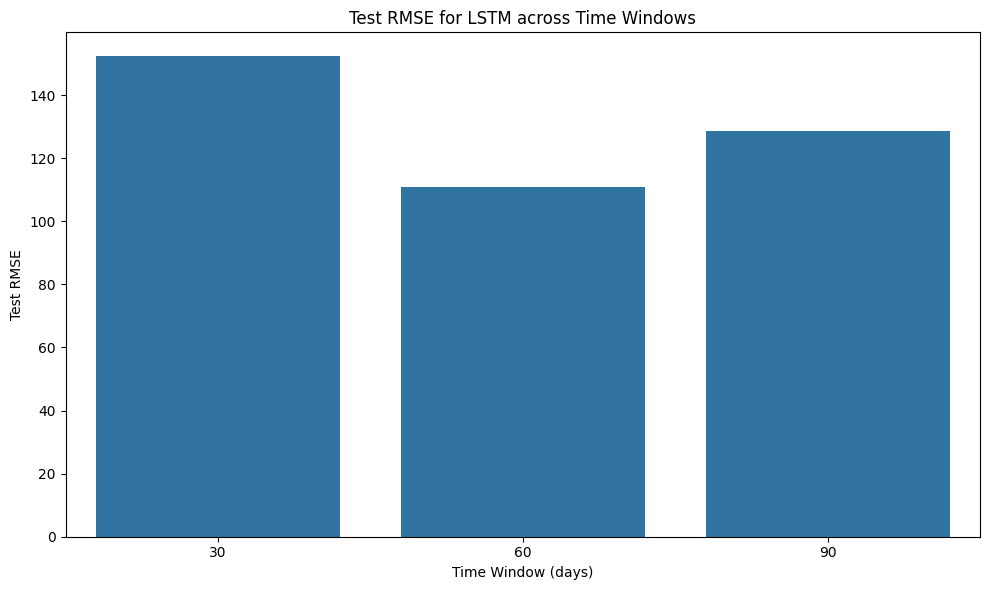

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the trained_models dictionary for easier plotting
results_list = []
for model_days, metrics in trained_models.items():
    parts = model_days.split('_')
    model_name = '_'.join(parts[:-2]) if len(parts) > 2 else parts[0] # Handle model names with underscores
    days = int(parts[-2]) # Extract the number of days
    results_list.append({
        'Model': model_name,
        'Time Window (days)': days,
        'Train MAE': metrics['train_mae'],
        'Train RMSE': metrics['train_rmse'],
        'Test MAE': metrics['test_mae'],
        'Test RMSE': metrics['test_rmse']
    })

results_df = pd.DataFrame(results_list)

# Sort the DataFrame by Time Window and then by Test RMSE
results_df_sorted = results_df.sort_values(by=['Time Window (days)', 'Test RMSE'])

# Visualize Test MAE for each Time Window
for days in sorted(results_df_sorted['Time Window (days)'].unique()):
    subset_df = results_df_sorted[results_df_sorted['Time Window (days)'] == days]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Test MAE', data=subset_df)
    plt.title(f'Test MAE for {days}-day Time Window')
    plt.ylabel('Test MAE')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize Test RMSE for each Time Window
for days in sorted(results_df_sorted['Time Window (days)'].unique()):
    subset_df = results_df_sorted[results_df_sorted['Time Window (days)'] == days]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Test RMSE', data=subset_df)
    plt.title(f'Test RMSE for {days}-day Time Window')
    plt.ylabel('Test RMSE')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize Test MAE for each Model across Time Windows
for model_name in results_df_sorted['Model'].unique():
    subset_df = results_df_sorted[results_df_sorted['Model'] == model_name]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Time Window (days)', y='Test MAE', data=subset_df)
    plt.title(f'Test MAE for {model_name} across Time Windows')
    plt.ylabel('Test MAE')
    plt.tight_layout()
    plt.show()

# Visualize Test RMSE for each Model across Time Windows
for model_name in results_df_sorted['Model'].unique():
    subset_df = results_df_sorted[results_df_sorted['Model'] == model_name]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Time Window (days)', y='Test RMSE', data=subset_df)
    plt.title(f'Test RMSE for {model_name} across Time Windows')
    plt.ylabel('Test RMSE')
    plt.tight_layout()
    plt.show()

In [11]:
# Save the results DataFrame to a CSV file
results_df.to_csv('model_performance_results.csv', index=False)
print("Model performance results saved to 'model_performance_results.csv'")

Model performance results saved to 'model_performance_results.csv'


Now, let's save the trained models using `joblib`. This will allow you to load them later without retraining.

In [12]:
import joblib

# Save the trained_models dictionary (which includes the models and metrics)
joblib.dump(trained_models, 'trained_models.joblib')
print("Trained models and metrics saved to 'trained_models.joblib'")

Trained models and metrics saved to 'trained_models.joblib'


If you need to use the trained models later, you can load them back into memory using the following code:

In [13]:
import joblib

# Load the trained models and metrics
loaded_models = joblib.load('trained_models.joblib')
print("Trained models and metrics loaded from 'trained_models.joblib'")

# You can now access the loaded models and their metrics, for example:
# print(loaded_models['KNN_30_days']['test_mae'])
# loaded_models['LSTM_60_days']['model'].predict(...)

Trained models and metrics loaded from 'trained_models.joblib'


In [14]:
# Example: Get the LSTM model trained on 90 days of data
lstm_90_model = loaded_models['LSTM_90_days']['model']

# Get the sample input data
sample_input = chunked_data['X_High_90'][5] # Using 'High' as per assignment

# Reshape the sample input to match the model's expected input shape (samples, timesteps, features)
# The DL models were trained with input shape (days, 1)
sample_input_reshaped = sample_input.reshape(1, sample_input.shape[0], 1)


print("Sample Input (first 10 days):", sample_input[:10])
print("Sample Input Shape:", sample_input.shape)
print("Reshaped Sample Input Shape:", sample_input_reshaped.shape)


# Make a prediction using the loaded model
predicted_value = lstm_90_model.predict(sample_input_reshaped)

# The output of predict for a single sample will be a 2D array, so flatten it or access the value
print("\nPredicted High Price:", predicted_value.flatten()[0])

Sample Input (first 10 days): [1662.1  1639.9  1631.55 1671.15 1627.4  1668.45 1615.15 1644.45 1644.4
 1626.5 ]
Sample Input Shape: (90,)
Reshaped Sample Input Shape: (1, 90, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step

Predicted High Price: 4.8961477


In [15]:
# Identify the best model for each time window based on Test MAE and Test RMSE
best_models_mae = results_df_sorted.loc[results_df_sorted.groupby('Time Window (days)')['Test MAE'].idxmin()]
best_models_rmse = results_df_sorted.loc[results_df_sorted.groupby('Time Window (days)')['Test RMSE'].idxmin()]

print("Best performing model for each time window based on Test MAE:")
display(best_models_mae)

print("\nBest performing model for each time window based on Test RMSE:")
display(best_models_rmse)

Best performing model for each time window based on Test MAE:


,Model,Time Window (days),Train MAE,Train RMSE,Test MAE,Test RMSE
0,KNN,30,46.031323,73.985985,63.079316,100.940809
5,KNN,60,40.522926,63.901461,57.765044,93.625147
10,KNN,90,39.594311,62.979267,50.431149,78.686046



Best performing model for each time window based on Test RMSE:


,Model,Time Window (days),Train MAE,Train RMSE,Test MAE,Test RMSE
3,GRU,30,65.827026,96.621052,67.534918,100.259368
5,KNN,60,40.522926,63.901461,57.765044,93.625147
10,KNN,90,39.594311,62.979267,50.431149,78.686046


## Project Summary

Based on the evaluation of the models trained to predict the **High** price of the NIFTY 50 index using 30, 60, and 90-day time windows, the following models performed best according to the Test MAE and Test RMSE metrics:

**Best performing model for each time window based on Test MAE:**

| Model   |   Time Window (days) |   Train MAE |   Train RMSE |   Test MAE |   Test RMSE |
|:--------|---------------------:|------------:|-------------:|-----------:|------------:|
| KNN     |                   30 |     46.0313 |      73.986  |    63.0793 |    100.941  |
| KNN     |                   60 |     40.5229 |      63.9015 |    57.765  |     93.6251 |
| KNN     |                   90 |     39.5943 |      62.9793 |    50.4311 |     78.686  |

**Best performing model for each time window based on Test RMSE:**

| Model   |   Time Window (days) |   Train MAE |   Train RMSE |   Test MAE |   Test RMSE |
|:--------|---------------------:|------------:|-------------:|-----------:|------------:|
| GRU     |                   30 |     65.827  |      96.6211 |    67.5349 |    100.259  |
| KNN     |                   60 |     40.5229 |      63.9015 |    57.765  |     93.6251 |
| KNN     |                   90 |     39.5943 |      62.9793 |    50.4311 |     78.686  |

**Key Observations:**

*   For the 60-day and 90-day time windows, the **KNN** model achieved the best performance in terms of both Test MAE and Test RMSE.
*   For the 30-day time window, **KNN** had the lowest Test MAE, while the **GRU** model had the lowest Test RMSE.
*   Generally, increasing the time window from 30 to 90 days led to improved performance (lower MAE and RMSE) for the KNN model.

This analysis helps in understanding which models and time windows are most effective for predicting the 'High' price based on the chosen metrics.